In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("E:\Python\ML_PROJECTS\Machine_Learning_Projects\Amazon_Top_50_Selling_books\\bestsellers with categories.csv")

In [4]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


# Data Visualization and analysis

Text(0, 0.5, 'count')

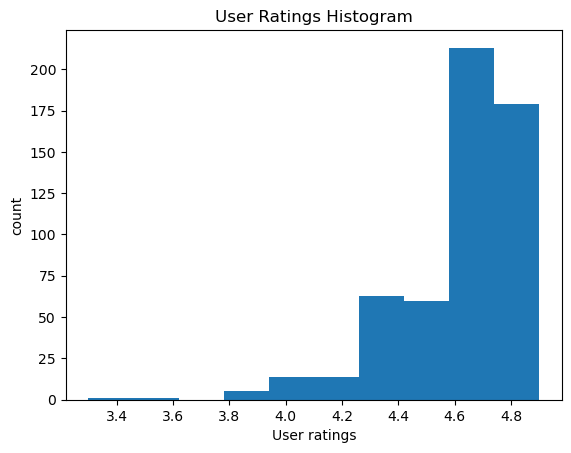

In [10]:
plt.hist(df['User Rating'],label='user_ratings')
plt.title('User Ratings Histogram')
plt.xlabel('User ratings')
plt.ylabel('count')

Based on user ratings we will divide the popularity of books into four stages:

Extremely Popular	　4.8 or 4.9

Very Popular	4.5 ~ 4.7

Fairly Popular	4.0 ~ 4.4

Popular	3.3 ~ 3.9

In [11]:
popularity=[0,0,0,0]
for i in df['User Rating']:
    if i >= 4.8:
        popularity[0] +=1
    elif i >= 4.5:
        popularity[1] +=1
    elif i >= 4.0:
        popularity[2] +=1
    else:
        popularity[3]+=1

Text(0.5, 1.0, 'Popularity count based on User ratings')

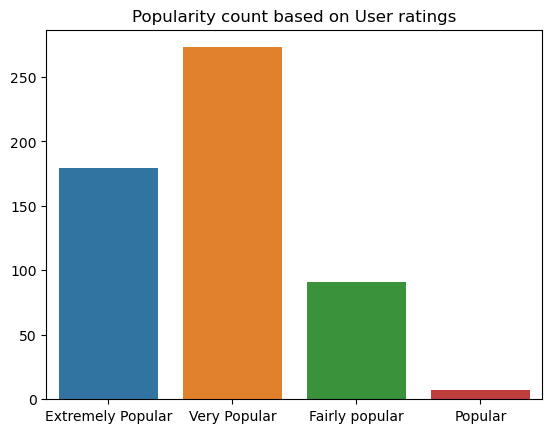

In [15]:
sns.barplot(x=['Extremely Popular','Very Popular','Fairly popular','Popular'],y=popularity)
plt.title('Popularity count based on User ratings')

In [17]:
#books with rating 4.9
df[df['User Rating'] >= 4.9][['Name','Author']]

,Name,Author
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker


# Does the name of books affect User Rating?
Of course, the book which has short title is not always popular, and vice versa.
However, the short title has the advantage of being simple and easy to understand, and the long title has that of giving readers an accurate understanding of what the book is like.
Then, we try to find out the relationships between the length of name and rating.

Text(0.5, 1.0, 'Length of book name histogram')

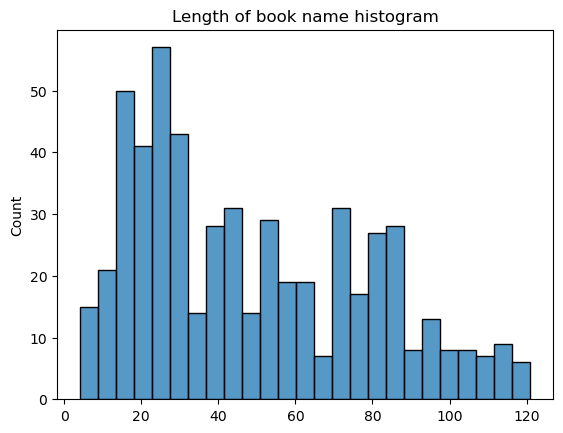

In [24]:
book_name_len=[]
for i in df['Name']:
    book_name_len.append(len(i))

sns.histplot(book_name_len,bins=25)
plt.title('Length of book name histogram')

Relationship between popularity and length of book name

In [29]:
df['Length of book name']=book_name_len

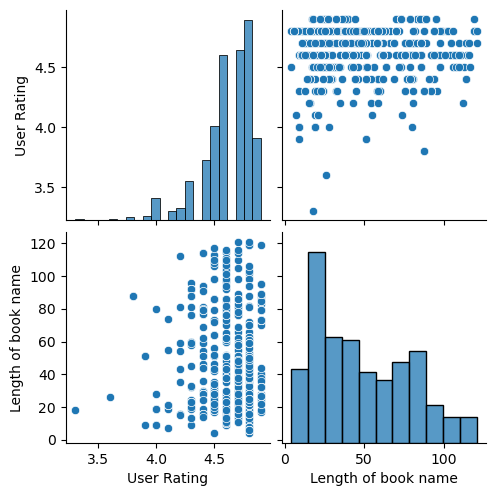

In [37]:
sns.pairplot(df,vars=['User Rating','Length of book name'])

It seems that there is no correlation between the popularity and the length of name.

# Author: Who Wrote the Bestselling Book?📕
The column "Author" shows the name of the author who wrote the bestselling book.
There are very few authors who can write bestselling books.

In [48]:
authors=df['Author'].value_counts()
authors_name=[]
authors_writings=[]
for i in range(len(authors)):
    authors_name.append(authors.keys()[i])
    authors_writings.append(authors[i])

popular_authors=pd.DataFrame(authors).reset_index()
popular_authors=popular_authors[popular_authors['Author'] >=7]
popular_authors
    


,index,Author
0,Jeff Kinney,12
1,Gary Chapman,11
2,Rick Riordan,11
3,Suzanne Collins,11
4,American Psychological Association,10
5,Dr. Seuss,9
6,Gallup,9
7,Rob Elliott,8
8,Stephen R. Covey,7
9,Stephenie Meyer,7


Text(0, 0.5, 'Number of books written')

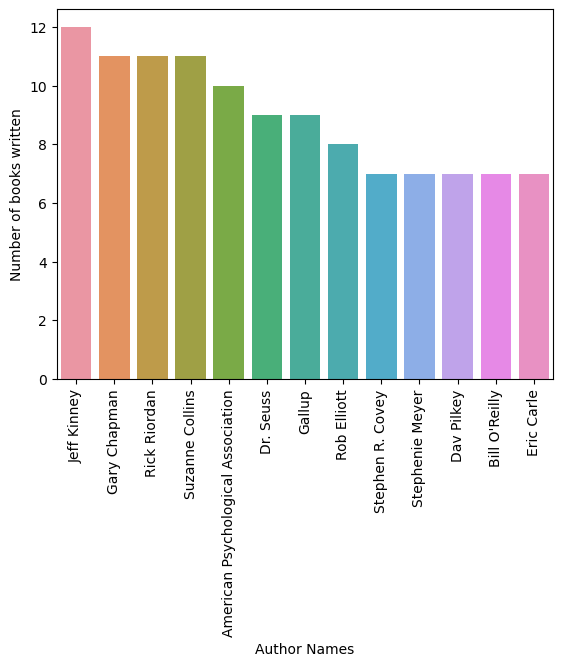

In [55]:
sns.barplot('index','Author',data=popular_authors)
plt.xticks(rotation=90)
plt.xlabel('Author Names')
plt.ylabel('Number of books written')

# Reviews: The Number of Reviews 📝 by Readers

<AxesSubplot:xlabel='Reviews', ylabel='Count'>

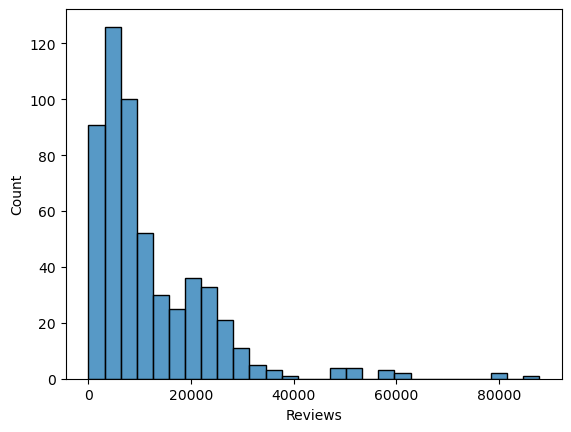

In [65]:
sns.histplot(df['Reviews'])

In [68]:
groupdf=df.groupby(by='Name')[['Reviews']].sum().reset_index()
groupdf=groupdf[groupdf['Reviews'] >=100000]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Becoming'),
  Text(1, 0, 'Gone Girl'),
  Text(2, 0, 'How to Win Friends & Influence People'),
  Text(3, 0, 'Jesus Calling: Enjoying Peace in His Presence (with Scripture References)'),
  Text(4, 0, "Oh, the Places You'll Go!"),
  Text(5, 0, 'The 5 Love Languages: The Secret to Love that Lasts'),
  Text(6, 0, 'The Fault in Our Stars'),
  Text(7, 0, 'The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)'),
  Text(8, 0, 'The Girl on the Train'),
  Text(9, 0, 'The Very Hungry Caterpillar'),
  Text(10, 0, 'To Kill a Mockingbird'),
  Text(11, 0, 'Unbroken: A World War II Story of Survival, Resilience, and Redemption'),
  Text(12, 0, 'Wonder')])

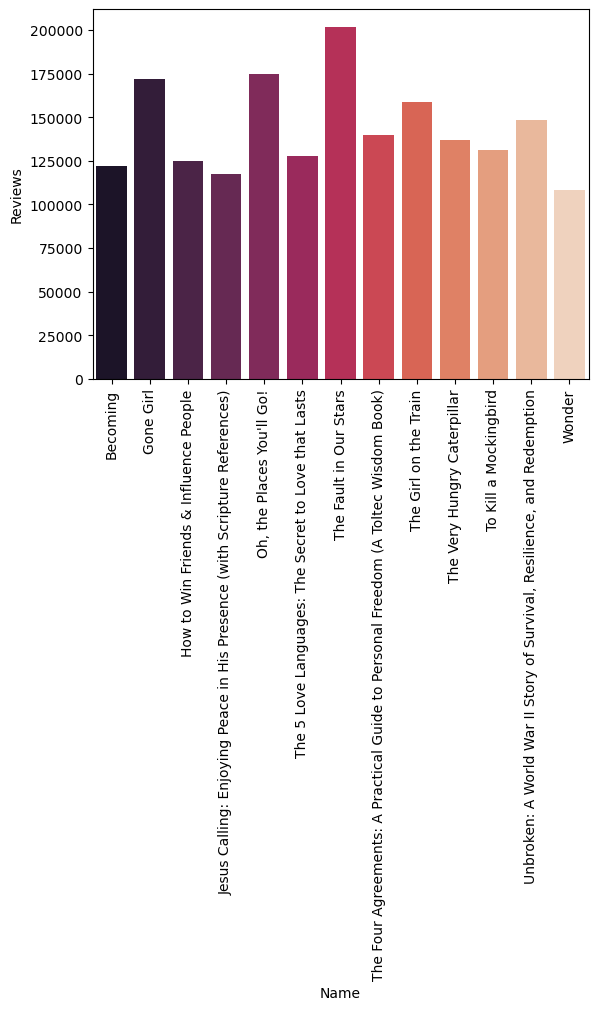

In [74]:
sns.barplot('Name','Reviews',data=groupdf,palette='rocket')
plt.xticks(rotation=90)

# BOOKs VS PRICE

In [75]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,Length of book name
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,29
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,17
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,39
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,22
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,66
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,44
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,86
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,86
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,86


<AxesSubplot:xlabel='Price', ylabel='Count'>

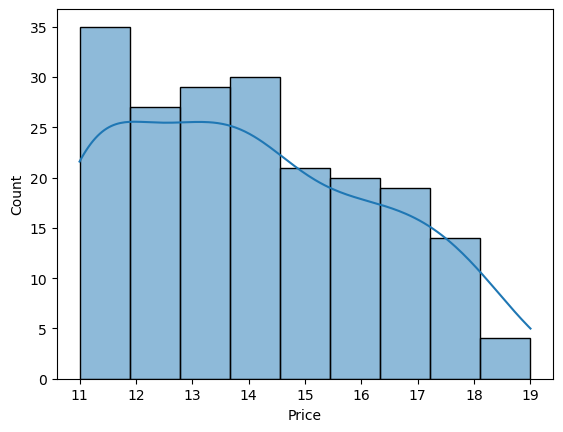

In [86]:
price_df=df[(df['Price']< 20) & (df['Price'] > 10)]
sns.histplot(price_df['Price'],kde=True)

In [132]:
Price_group_df=pd.DataFrame(df[(df['Price']==11)|(df['Price']==12)].groupby('Name').size()).reset_index().rename(columns={'0':'Counts'})
Price_group_df=Price_group_df.rename(columns={0:'Counts'})
print("The book that sold most")
Price_group_df[Price_group_df['Counts']==Price_group_df['Counts'].max()]

The book that sold most


,Name,Counts
13,How to Win Friends & Influence People,5


# Is the Book Fiction or Non-fiction?

In [133]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,Length of book name
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,29
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,17
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,39
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,22
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,66
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,44
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,86
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,86
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,86


<AxesSubplot:xlabel='Genre', ylabel='count'>

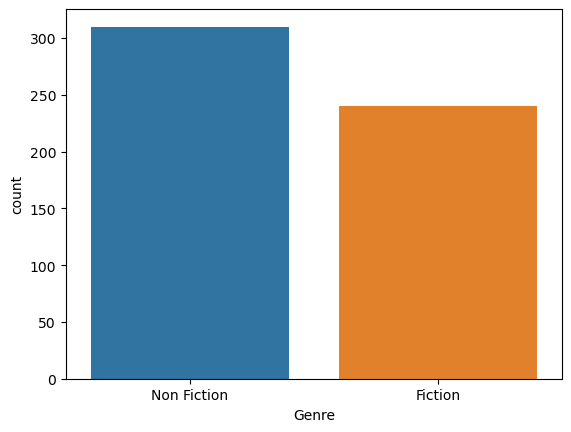

In [134]:
sns.countplot(df['Genre'])

In [138]:
high_reviews_df=df[df['Reviews'] > 50000]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Becoming'),
  Text(1, 0, 'Gone Girl'),
  Text(2, 0, 'The Fault in Our Stars'),
  Text(3, 0, 'The Girl on the Train'),
  Text(4, 0, 'Where the Crawdads Sing')])

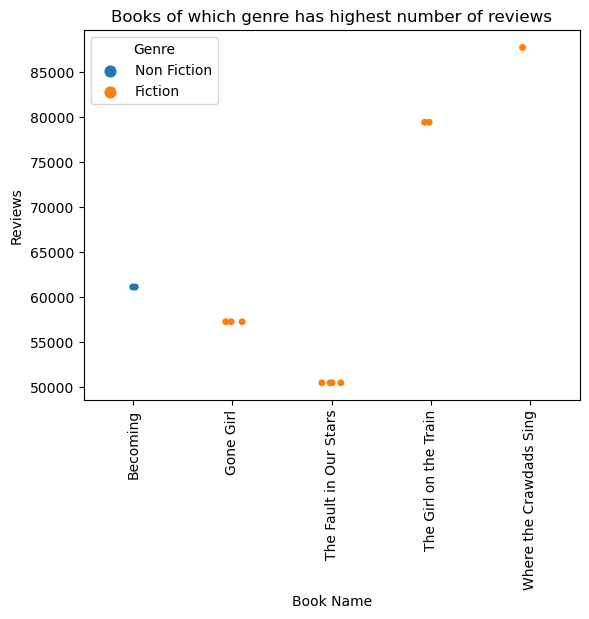

In [142]:
sns.stripplot(data=high_reviews_df,x='Name',y='Reviews',hue='Genre')
plt.title('Books of which genre has highest number of reviews')
plt.xlabel("Book Name")
plt.ylabel("Reviews")
plt.xticks(rotation=90)